In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sensor_data.csv")

In [3]:
tmp_x = data.iloc[:, :-1]

In [4]:
scaler = MinMaxScaler()
scaler.fit(tmp_x)
# scaler.data_max_
x = scaler.transform(tmp_x)

In [5]:
y = np.array(data.iloc[:, -1])

In [6]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size = 0.3)

In [24]:
model = Sequential()

model.add(Dense(64, input_shape=(2,), kernel_initializer='normal', activation='relu'))

model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(x_trn, y_trn, epochs=40, batch_size = 10,  verbose=1, validation_split=0.2)


Epoch 1/40
11/11 [==============================] - 1s 21ms/step - loss: 1591.2850 - mse: 1591.2850 - mae: 22.6370 - val_loss: 2167.7556 - val_mse: 2167.7556 - val_mae: 28.9897
Epoch 2/40
11/11 [==============================] - 0s 7ms/step - loss: 1585.1506 - mse: 1585.1506 - mae: 22.6610 - val_loss: 2154.1775 - val_mse: 2154.1772 - val_mae: 28.9921
Epoch 3/40
11/11 [==============================] - 0s 7ms/step - loss: 1566.7976 - mse: 1566.7976 - mae: 22.7387 - val_loss: 2114.0576 - val_mse: 2114.0576 - val_mae: 28.9988
Epoch 4/40
11/11 [==============================] - 0s 6ms/step - loss: 1517.5959 - mse: 1517.5959 - mae: 22.9701 - val_loss: 2014.0781 - val_mse: 2014.0781 - val_mae: 29.0140
Epoch 5/40
11/11 [==============================] - 0s 5ms/step - loss: 1417.1117 - mse: 1417.1117 - mae: 23.6858 - val_loss: 1823.0496 - val_mse: 1823.0496 - val_mae: 29.0399
Epoch 6/40
11/11 [==============================] - 0s 6ms/step - loss: 1245.2501 - mse: 1245.2501 - mae: 24.7618 - val

In [25]:
predictions = model.predict(x_tst)

In [26]:
y_tst = np.array(y_tst).reshape(56,1)

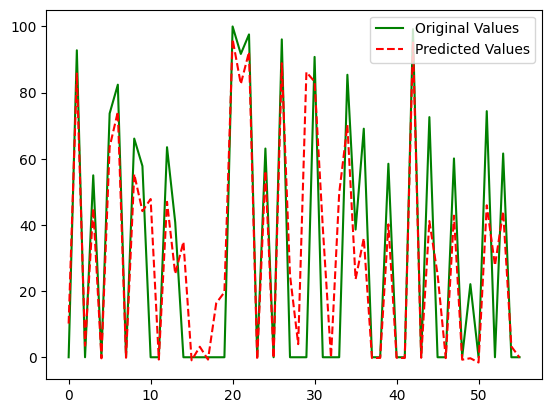

In [40]:
plt.plot(np.arange(y_tst.size), y_tst, color = "green", label="Original Values")
plt.plot(np.arange(predictions.size), predictions, linestyle='dashed', color = "red", label="Predicted Values")
plt.legend(loc = 'upper right')
plt.show()

In [41]:
model.save("iot_pred.model")

INFO:tensorflow:Assets written to: iot_pred.model\assets


In [42]:
loaded_model = tf.keras.models.load_model("iot_pred.model")

In [43]:
testData = np.hstack((x_tst, y_tst))
np.savetxt('test_data.txt', testData)